In [44]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
portfolio =pd.read_csv('/Users/yvette/Desktop/INSY 662/archive/portfolio.csv')
profile=pd.read_csv('/Users/yvette/Desktop/INSY 662/archive/profile.csv')
transcript=pd.read_csv('/Users/yvette/Desktop/INSY 662/archive/transcript.csv')
portfolio.head()

,Unnamed: 0,reward,channels,difficulty,duration,offer_type,id
0,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [45]:
for col in portfolio.columns:
    print(col)

Unnamed: 0
reward
channels
difficulty
duration
offer_type
id


In [46]:
# drop the unnamed column where represent the index
portfolio = portfolio.drop('Unnamed: 0', axis = 1)
profile = profile.drop('Unnamed: 0', axis = 1)
transcript = transcript.drop('Unnamed: 0', axis = 1)


In [47]:
profile_no_na= profile[profile['age'] != 118]
profile_no_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               14825 non-null  int64  
 2   id                14825 non-null  object 
 3   became_member_on  14825 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 694.9+ KB


In [48]:

# Converting 'became_member_on' to datetime format
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')

# Drop rows from the profile dataset where the age is 118
profile_cleaned = profile[profile['age'] != 118]

# Check the result after dropping the rows
profile_cleaned.info(), profile_cleaned.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   gender            14825 non-null  object        
 1   age               14825 non-null  int64         
 2   id                14825 non-null  object        
 3   became_member_on  14825 non-null  datetime64[ns]
 4   income            14825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 694.9+ KB


(None,
                 age         income
 count  14825.000000   14825.000000
 mean      54.393524   65404.991568
 std       17.383705   21598.299410
 min       18.000000   30000.000000
 25%       42.000000   49000.000000
 50%       55.000000   64000.000000
 75%       66.000000   80000.000000
 max      101.000000  120000.000000)

In [49]:
transcript['value'].head()

0    {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1    {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2    {'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3    {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4    {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}
Name: value, dtype: object

In [50]:
# split value column in transcript
value_column = transcript['value']
value_column = value_column.apply(eval)
#extract key and values
dictionary_key_column = [list(d.keys())[0] for d in value_column]
dictionary_value_column = [list(d.values())[0] for d in value_column]
value_split = pd.DataFrame(columns = ['newkey', 'newvalue'])
value_split['newkey'] = dictionary_key_column
value_split['newvalue'] = dictionary_value_column
#repleace and combine into transcript
df_transcript= transcript.drop('value', axis = 1)
df_transcript = pd.concat([df_transcript, value_split], axis = 1)
df_transcript

,person,event,time,newkey,newvalue
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,offer id,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,e2127556f4f64592b11af22de27a7932,offer received,0,offer id,2906b810c7d4411798c6938adc9daaa5
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,offer id,fafdcd668e3743c1bb461111dcafc2a4
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,offer id,4d5c57ea9a6940dd891ad53e9dbe8da0
...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,amount,1.59
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,amount,9.53
306531,a00058cf10334a308c68e7631c529907,transaction,714,amount,3.61
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,amount,3.53


In [51]:
portfolio_copy =portfolio.copy()
profile_copy = profile_cleaned.copy()
transcript_copy = df_transcript.copy()
profile_copy

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000.0


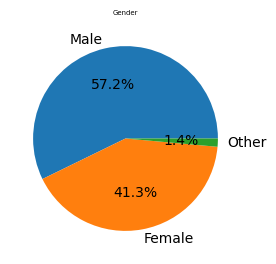

In [52]:
##gender distribution pie chart
age_size = profile_cleaned['gender'].value_counts()
age_label = ['Male', 'Female', 'Other']
plt.figure(figsize = (3,3))
plt.pie(x = age_size, labels = age_label, autopct = '%1.1f%%')
plt.title('Gender', fontsize = 5)
plt.show()

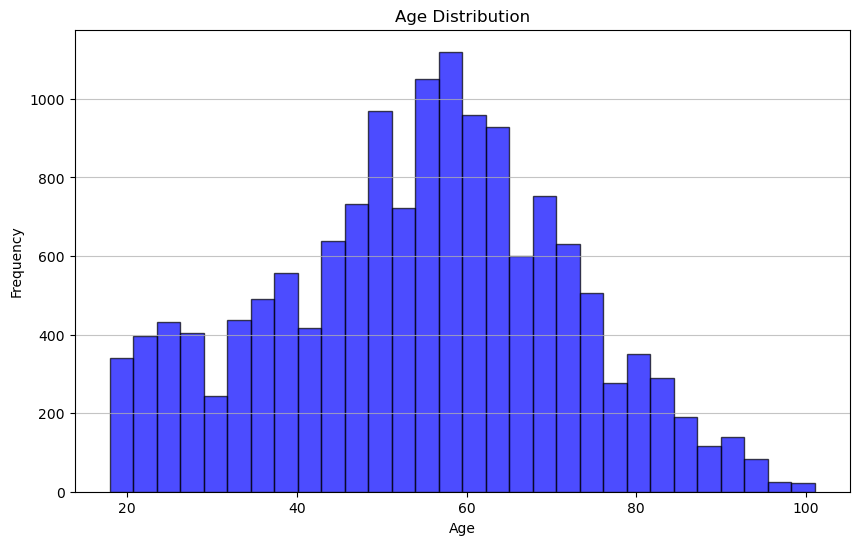

count    14825.000000
mean        54.393524
std         17.383705
min         18.000000
25%         42.000000
50%         55.000000
75%         66.000000
max        101.000000
Name: age, dtype: float64


/var/folders/44/qlcp6s1x0dj50t76wqx6l6rr0000gn/T/ipykernel_12781/263537494.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profile_cleaned['age_group'] = pd.cut(profile_cleaned['age'], bins=age_bins, labels=age_labels, right=False)


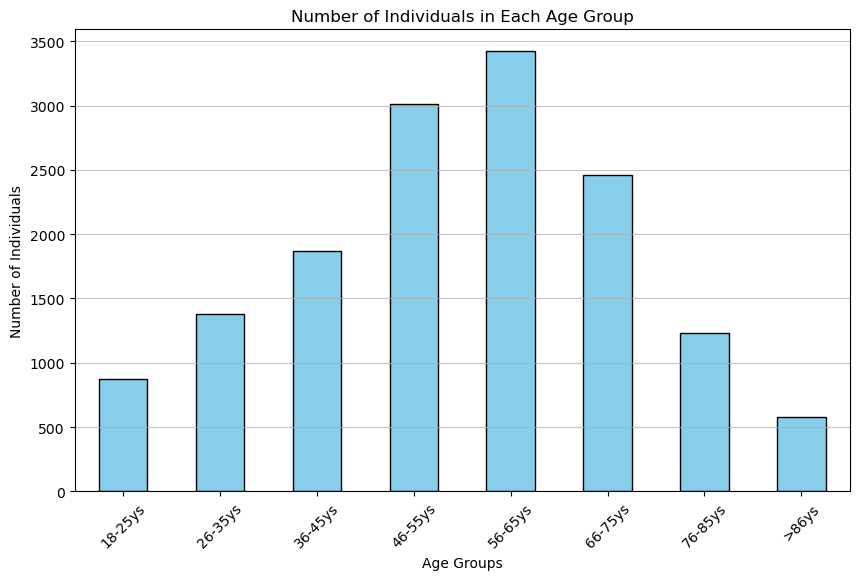

In [53]:
#age distribution histogram
plt.figure(figsize=(10,6))
plt.hist(profile_cleaned['age'], bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()
#The distribution appears to be fairly uniform with a slight increase in frequency around the 50-70 age range.
print(profile_cleaned['age'].describe())

##visualize by certain age group
age_bins = [18, 25, 35, 45, 55, 65, 75, 85, float('inf')]
age_labels = ['18-25ys', '26-35ys', '36-45ys', '46-55ys', '56-65ys', '66-75ys', '76-85ys', '>86ys']

# Create a new column 'age_group' in the dataframe
profile_cleaned['age_group'] = pd.cut(profile_cleaned['age'], bins=age_bins, labels=age_labels, right=False)

# Count the number of instances in each age group
age_group_counts = profile_cleaned['age_group'].value_counts(sort=False)

# Visualize the age groups
plt.figure(figsize=(10,6))
age_group_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Individuals in Each Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

count     14825.000000
mean      65404.991568
std       21598.299410
min       30000.000000
25%       49000.000000
50%       64000.000000
75%       80000.000000
max      120000.000000
Name: income, dtype: float64


/var/folders/44/qlcp6s1x0dj50t76wqx6l6rr0000gn/T/ipykernel_12781/188259583.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profile_cleaned['income_group'] = pd.cut(profile_cleaned['income'], bins=income_bins, labels=income_labels, include_lowest=True, right=False)


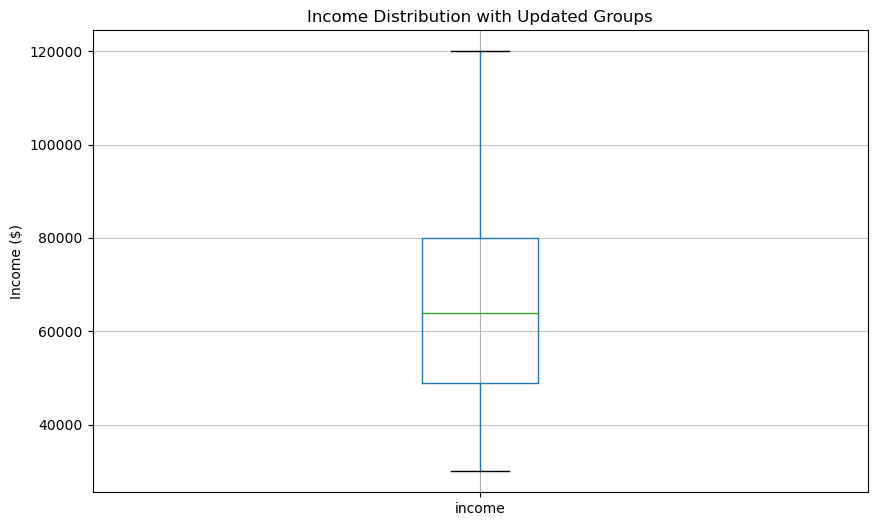

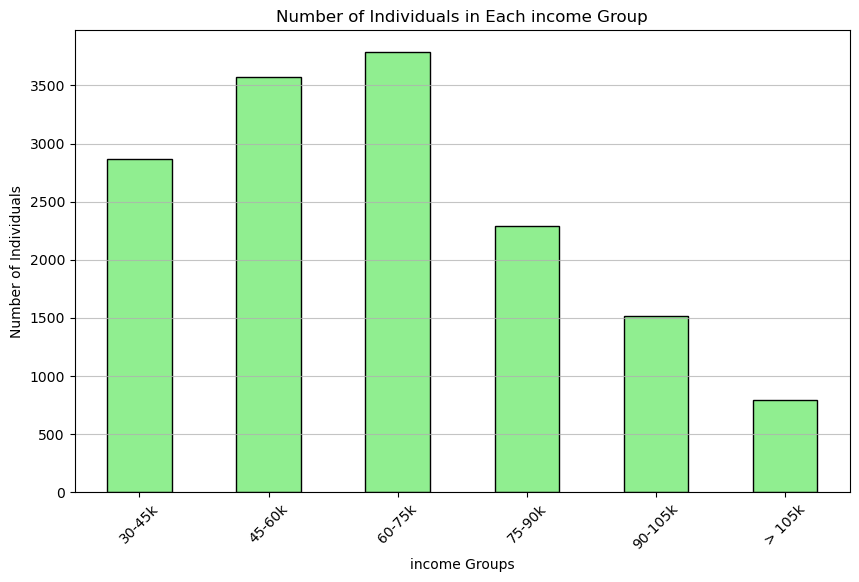

In [54]:
###income analyze
print(profile_cleaned['income'].describe())
# Redefine the income bins and labels according to the provided ranges
income_bins = [30000, 45000, 60000, 75000, 90000, 105000, float('inf')]
income_labels = ['30-45k', '45-60k', '60-75k', '75-90k', '90-105k', '> 105k']

# Create a new column 'income_group' in the dataframe with the updated bins and labels
profile_cleaned['income_group'] = pd.cut(profile_cleaned['income'], bins=income_bins, labels=income_labels, include_lowest=True, right=False)
income_group_counts = profile_cleaned['income_group'].value_counts(sort=False)

# Generate a box plot for the income column with the updated income groups
plt.figure(figsize=(10,6))
profile_cleaned.boxplot(column='income')
plt.title('Income Distribution with Updated Groups')
plt.ylabel('Income ($)')
plt.grid(axis='y', alpha=0.75)
plt.show()

plt.figure(figsize=(10,6))
income_group_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Number of Individuals in Each income Group')
plt.xlabel('income Groups')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

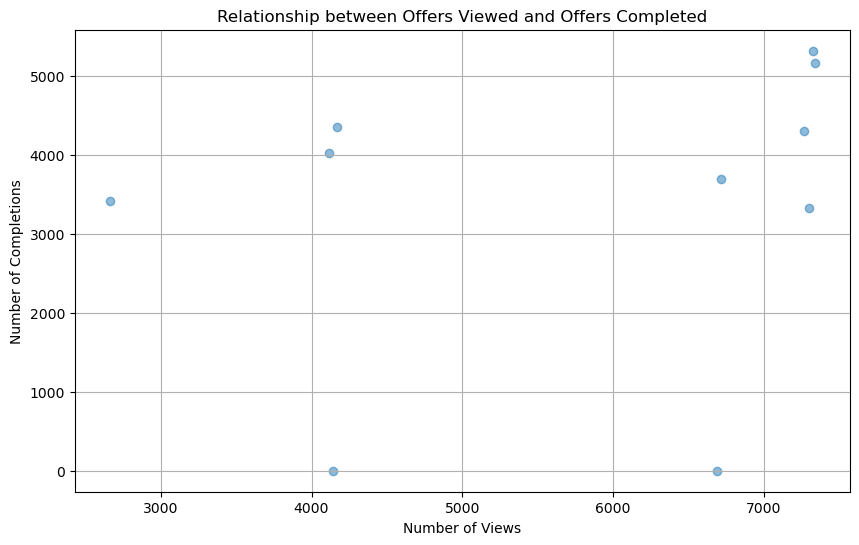

In [55]:
import matplotlib.pyplot as plt

# Create a scatter plot to visualize the relationship between views and completions
plt.figure(figsize=(10, 6))
plt.scatter(offer_counts['viewed'], offer_counts['completed'], alpha=0.5)
plt.title('Relationship between Offers Viewed and Offers Completed')
plt.xlabel('Number of Views')
plt.ylabel('Number of Completions')
plt.grid(True)
plt.show()


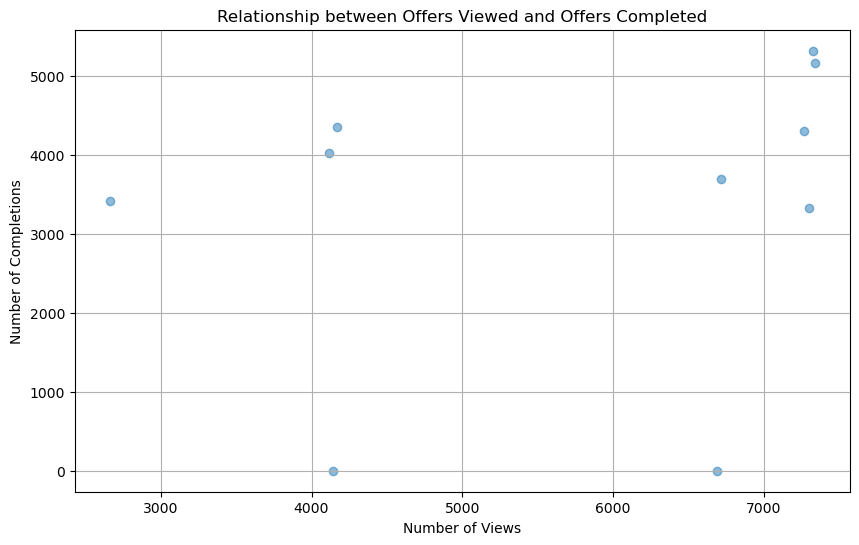

In [56]:


filtered_data = df_transcript[df_transcript['event'].isin(['offer viewed', 'offer completed'])]
filtered_data = filtered_data[filtered_data['newkey'].isin(['offer id', 'offer_id'])]
offer_viewed_counts = filtered_data[filtered_data['event'] == 'offer viewed']['newvalue'].value_counts()
offer_completed_counts = filtered_data[filtered_data['event'] == 'offer completed']['newvalue'].value_counts()
offer_counts = pd.DataFrame({'viewed': offer_viewed_counts, 'completed': offer_completed_counts})

# Reset index to make 'offer_id' a column and fill NaN values with 0
offer_counts.reset_index(inplace=True)
offer_counts.fillna(0, inplace=True)

# Rename 'index' to 'offer_id'
offer_counts.rename(columns={'index': 'offer_id'}, inplace=True)

offer_counts['conversion_rate'] = offer_counts['completed'] / offer_counts['viewed']


plt.figure(figsize=(10, 6))
plt.scatter(offer_counts['viewed'], offer_counts['completed'], alpha=0.5)
plt.title('Relationship between Offers Viewed and Offers Completed')
plt.xlabel('Number of Views')
plt.ylabel('Number of Completions')
plt.grid(True)
plt.show()


In [57]:
customer_behavior = pd.DataFrame(columns = ['person', 'num_received', 'num_viewed', 'num_completed', 'num_transactions', 'money_spent'])
# Remove rows of customers with missing gender and income
missing_income = profile_cleaned[profile_cleaned['income'].isna()]
id_to_remove = missing_income['id']
transcripts_filtered = df_transcript[~df_transcript['person'].isin(id_to_remove)].reset_index(drop = True)

# Add data to `person`, ordered in ascending order
customer_behavior['person'] = transcripts_filtered.value_counts('person').sort_index().index.values

# Aggregate df transcripts
transcripts_filtered = transcripts_filtered.sort_values('person')
transcripts_grouped = transcripts_filtered.groupby(['person', 'event']).count()
transcripts_grouped.head()


time  newkey  newvalue
person                           event                                  
0009655768c64bdeb2e877511632db8f offer completed     3       3         3
                                 offer received      5       5         5
                                 offer viewed        4       4         4
                                 transaction         8       8         8
00116118485d4dfda04fdbaba9a87b5c offer received      2       2         2

In [58]:


num_received = df_transcript[df_transcript['event'] == 'offer received'].groupby('person')['event'].count()
num_viewed = df_transcript[df_transcript['event'] == 'offer viewed'].groupby('person')['event'].count()
num_completed = df_transcript[df_transcript['event'] == 'offer completed'].groupby('person')['event'].count()


transactions = df_transcript[df_transcript['event'] == 'transaction']
num_transactions = transactions.groupby('person')['event'].count()
money_spent = transactions.groupby('person')['newvalue'].sum()

customer_behavior = pd.DataFrame({
    'person': num_received.index,
    'num_received': num_received.values,
    'num_viewed': num_viewed.reindex(num_received.index, fill_value=0).values,
    'num_completed': num_completed.reindex(num_received.index, fill_value=0).values,
    'num_transactions': num_transactions.reindex(num_received.index, fill_value=0).values,
    'money_spent': money_spent.reindex(num_received.index, fill_value=0).values
})


customer_behavior['money_spent'] = customer_behavior['money_spent'].astype(float)
print(customer_behavior.head())


                             person  num_received  num_viewed  num_completed  \
0  0009655768c64bdeb2e877511632db8f             5           4              3   
1  00116118485d4dfda04fdbaba9a87b5c             2           2              0   
2  0011e0d4e6b944f998e987f904e8c1e5             5           5              3   
3  0020c2b971eb4e9188eac86d93036a77             5           3              3   
4  0020ccbbb6d84e358d3414a3ff76cffd             4           4              3   

   num_transactions  money_spent  
0                 8       127.60  
1                 3         4.09  
2                 5        79.46  
3                 8       196.86  
4                12       154.05  


In [59]:

scaler = StandardScaler()

features_to_scale = ['num_received', 'num_viewed', 'num_completed', 'num_transactions', 'money_spent']
customer_behavior_scaled = customer_behavior.copy()
customer_behavior_scaled[features_to_scale] = scaler.fit_transform(customer_behavior[features_to_scale])

# Check for outliers by calculating the IQR
Q1 = customer_behavior_scaled[features_to_scale].quantile(0.25)
Q3 = customer_behavior_scaled[features_to_scale].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers instead of removing them
for feature in features_to_scale:
    customer_behavior_scaled[feature] = customer_behavior_scaled[feature].clip(lower_bound[feature], upper_bound[feature])

# The DataFrame is now preprocessed and ready for clustering
print(customer_behavior_scaled.head())

                             person  num_received  num_viewed  num_completed  \
0  0009655768c64bdeb2e877511632db8f      0.476725    0.465344       0.637901   
1  00116118485d4dfda04fdbaba9a87b5c     -1.853158   -1.077540      -1.230827   
2  0011e0d4e6b944f998e987f904e8c1e5      0.476725    1.236786       0.637901   
3  0020c2b971eb4e9188eac86d93036a77      0.476725   -0.306098       0.637901   
4  0020ccbbb6d84e358d3414a3ff76cffd     -0.455228    0.465344       0.637901   

   num_transactions  money_spent  
0         -0.034287     0.183743  
1         -1.011586    -0.797008  
2         -0.620666    -0.198520  
3         -0.034287     0.733713  
4          0.747553     0.393773  


/Users/yvette/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yvette/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yvette/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yvette/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yvette/an

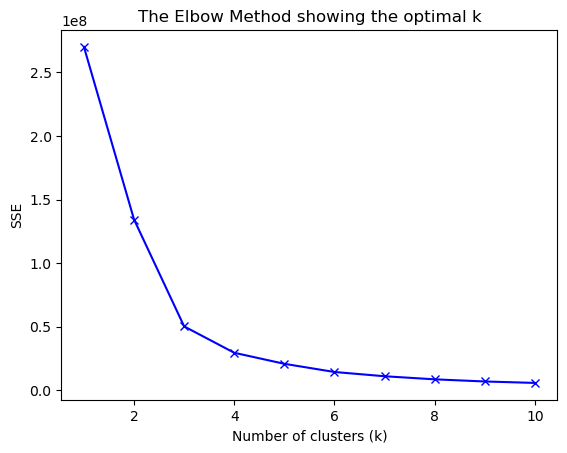

In [60]:
X = customer_behavior[features_to_scale].values

# Elbow method
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse[k] = kmeans.inertia_ # sum of squared distances to closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

cluster
0    4888
1    6031
2    6075
dtype: int64

 ************************************************************
Silhouette Score: 0.33886043970984436

 ************************************************************
        num_received num_viewed num_completed num_transactions money_spent
                mean       mean          mean             mean        mean
cluster                                                                   
0                5.1        4.1           1.0              5.4        38.8
1                3.5        2.2           1.2              6.4        67.8
2                5.0        4.1           3.6             12.2       193.7


/var/folders/44/qlcp6s1x0dj50t76wqx6l6rr0000gn/T/ipykernel_12781/880680262.py:26: FutureWarning: ['person'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  cluster_info = customer_with_cluster.groupby('cluster').agg([np.mean])


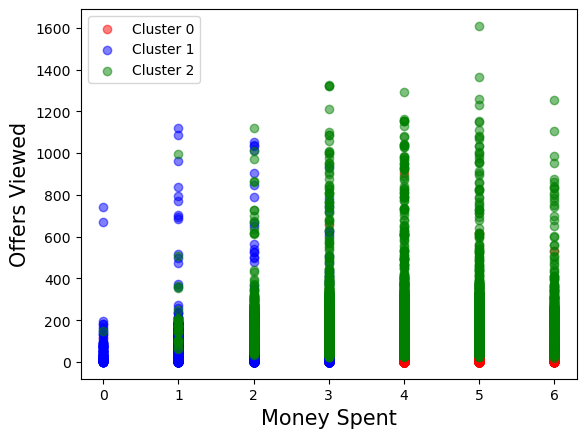

In [62]:
numeric_features = customer_behavior_scaled.select_dtypes(include=[np.number])

# Set the number of clusters to 3
k =3

# Assuming df_feature is a DataFrame that includes only numeric features for clustering
# If your DataFrame contains non-numeric columns, you need to select only the numeric features
numeric_features = df_feature.select_dtypes(include=[np.number])

# Initialize KMeans with k=3 and set n_init to a specific value to avoid the warning
kmeans = KMeans(n_clusters=k, n_init=10, random_state=10)
kmeans.fit(numeric_features)

# Assign clusters to each customer and count the number of customers in each cluster
customer_with_cluster = customer_behavior.assign(cluster=kmeans.labels_)
print(customer_with_cluster.value_counts('cluster').sort_index())

line_sep = '*' * 60
print('\n', line_sep)

# Calculate and print the silhouette score using only the numeric features
print('Silhouette Score:', metrics.silhouette_score(numeric_features, labels=kmeans.labels_))


# Aggregate the data by cluster and compute the mean for each feature
cluster_info = customer_with_cluster.groupby('cluster').agg([np.mean])
print('\n', line_sep)
# Print the mean feature values by cluster
print(cluster_info.round(1))

# Plot each cluster with a different color for 'num_viewed' and 'money_spent'
color_list = ['red', 'blue', 'green']  # Update color list for 3 clusters
legend_list = ['Cluster 0', 'Cluster 1', 'Cluster 2']  # Update legend list for 3 clusters
for i in range(k):
    plt.scatter(customer_with_cluster.loc[customer_with_cluster['cluster'] == i, 'num_viewed'],
                customer_with_cluster.loc[customer_with_cluster['cluster'] == i, 'money_spent'],
                c=color_list[i], label=legend_list[i], alpha=0.5)
plt.ylabel('Offers Viewed', fontsize=15)
plt.xlabel('Money Spent', fontsize=15)
plt.legend(legend_list)
plt.show()

In [ ]:
#Cluster 0 has a higher average number of offers received and viewed but lower completion and transactions compared to Cluster 2. The money spent is also the lowest among the three clusters, indicating this group may consist of more passive customers.
#Cluster 1 has the lowest average number of offers received and viewed, a moderate number of completions, and the highest number of transactions. Interestingly, the money spent is higher than Cluster 0 but lower than Cluster 2. This suggests that Cluster 1 might contain customers who are selective about the offers they engage with but transact frequently without those offers.
#Cluster 2 is characterized by a high number of offers received, an average number of offers viewed, the highest number of offers completed, and the highest money spent. This indicates that Cluster 2 contains customers who are highly engaged and also the biggest spenders.

#Cluster 0: Passive viewers with the lowest spending.
#Cluster 1: Active transactors who may not rely on offers to spend.
#Cluster 2: Highly engaged customers with the highest spending, likely influenced by offers.

In [63]:
# Assuming customer_behavior_scaled includes all the necessary features
X = customer_behavior_scaled.drop('cluster', axis=1)  # Features
y = customer_behavior_scaled['cluster']  # Target variable (cluster labels)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict on the test data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")



KeyError: "['cluster'] not found in axis"